In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [2]:
df = pd.read_csv('data-t50000-d15-r15.csv')
df.head()

,d,cpu_time_us,package_energy,core_energy
0,1,414496,16270963,1870798
1,2,178470,4367297,121774
2,3,119233,2979475,90694
3,4,89172,2237280,72399
4,5,72036,1835736,122


## Remove outliers

In [3]:
q_package_energy = df['package_energy'].quantile(0.99)
q_core_energy = df['core_energy'].quantile(0.99)
q_cpu_time = df['cpu_time_us'].quantile(0.99)

df = df[df['package_energy'] < q_package_energy]
df = df[df['core_energy'] < q_core_energy]
df = df[df['core_energy'] < q_cpu_time]

## Prepare variables

In [4]:
d = df['d']
cpu_time = df['cpu_time_us']
package_energy = df['package_energy']
core_energy = df['core_energy']

## CPU time

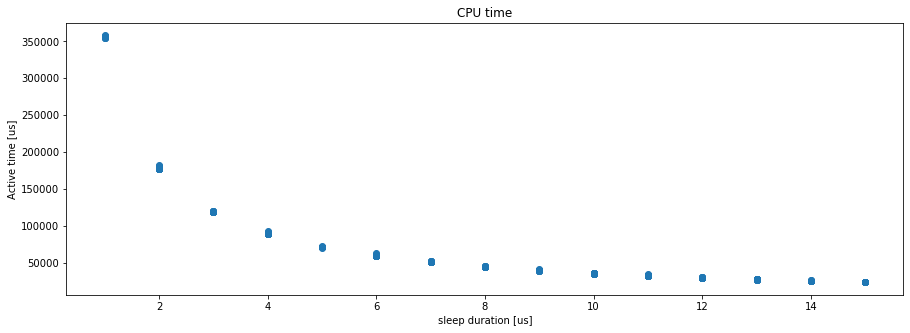

In [5]:
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('CPU time')
ax1.set_ylabel('Active time [us]')
ax1.set_xlabel('sleep duration [us]')
ax1.scatter(d, cpu_time);

## Energy

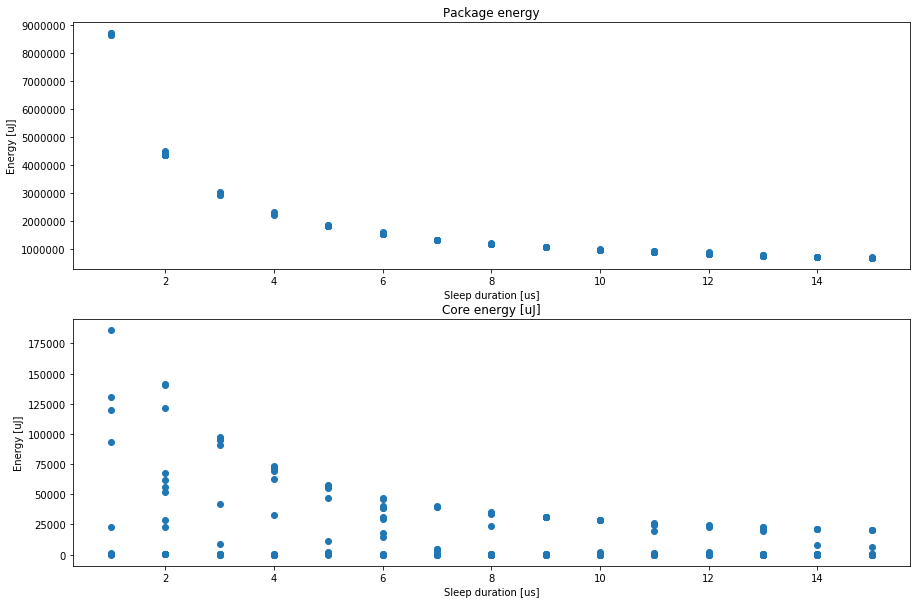

In [6]:
fig2, (ax2, ax3) = plt.subplots(2, figsize=(15, 10));

ax2.set_title('Package energy')
ax2.set_ylabel('Energy [uJ]')
ax2.set_xlabel('Sleep duration [us]')
ax2.scatter(d, package_energy);

ax3.set_title('Core energy [uJ]')
ax3.set_ylabel('Energy [uJ]')
ax3.set_xlabel('Sleep duration [us]')
ax3.scatter(d, core_energy);